# Introduction to Machine Learning
Created by Ondřej Pluskal and Marek Modrý for Machine Learning Meetups Prague.

Follow us on [Meetup.com](http://www.meetup.com/Prague-Machine-Learning/) [Facebook](https://www.facebook.com/machinelearningmeetups) [Twitter](https://twitter.com/mlmucz) and [our website](http://www.mlmu.cz/).
## Before you begin
If you are not familiar with how to use Jupyter Notebook, please follow the official [Guide](http://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/execute.html)

Also if you want to visualize your own decision trees you need [GraphViz](http://www.graphviz.org/) installed and in PATH.

# Iris Dataset
We start with the loading of the most famous Iris dataset. Iris is a flower (kosatec in czech) and there are three species. Setosa, Virginica and Versicolor.

This part of the notebook was inspired by another [Jupyter Notebook](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb). I recommend to read the introduction of this notebook, but not to follow it entirely. We comment on some properties of their methodology in Appendix 1 of this notebook.

In [1]:
# We are importing the seaborn library.
import seaborn as sns
# Seaborn library comes with built-in toy dataset you can explore.
iris = sns.load_dataset('iris')
# This is numpy library. It supports many numerical operations and is well optimized for matrix operations.
import numpy as np

# The dataset iris is imported in a form of Pandas DataFrame. Pandas is a library that imitates the R dataframe.
# It is well suited for data exploration. Below is the code how to import any dataset in the form of comma sepa-
# rated file (csv). Uncomment it and you can plug in any dataset you would like.
#import pandas as pd # Importing the pandas library.
#
#iris_data = pd.read_csv('iris-data.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# Pandas DataFrame comes with built in functions for simple exploration. The describe function will give you
# a basic statistical overview of all the numerical columns you have in your dataset.
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
# Here we can see the different species of iris. The important note here is that this is so called balanced
# dataset. Therefore we don't need to worry about the measures we will be using. For more information about
# imbalanced datasets, please consult Appendix 2.
iris.groupby("species").size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [4]:
# Here we only assign a convenience dictionary to map the species to numerical values.
name_dict = {'setosa':1, 'versicolor':2, 'virginica':3}

In [5]:
# Here we initialize the plotting function. The command window below tells jupyter to display plots inside
# the notebook.
%matplotlib inline
# Seaborn mentioned above is a plotting library that has many functions for easier data exploration. It is based
# on matplotlib library, that is inspired by Matlab plotting style. Matplotlib is the most common library for
# Python and it should be a helpful tool for visualizing your data for exploration as well as evaluation.
import matplotlib.pyplot as plt
import seaborn as sb
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

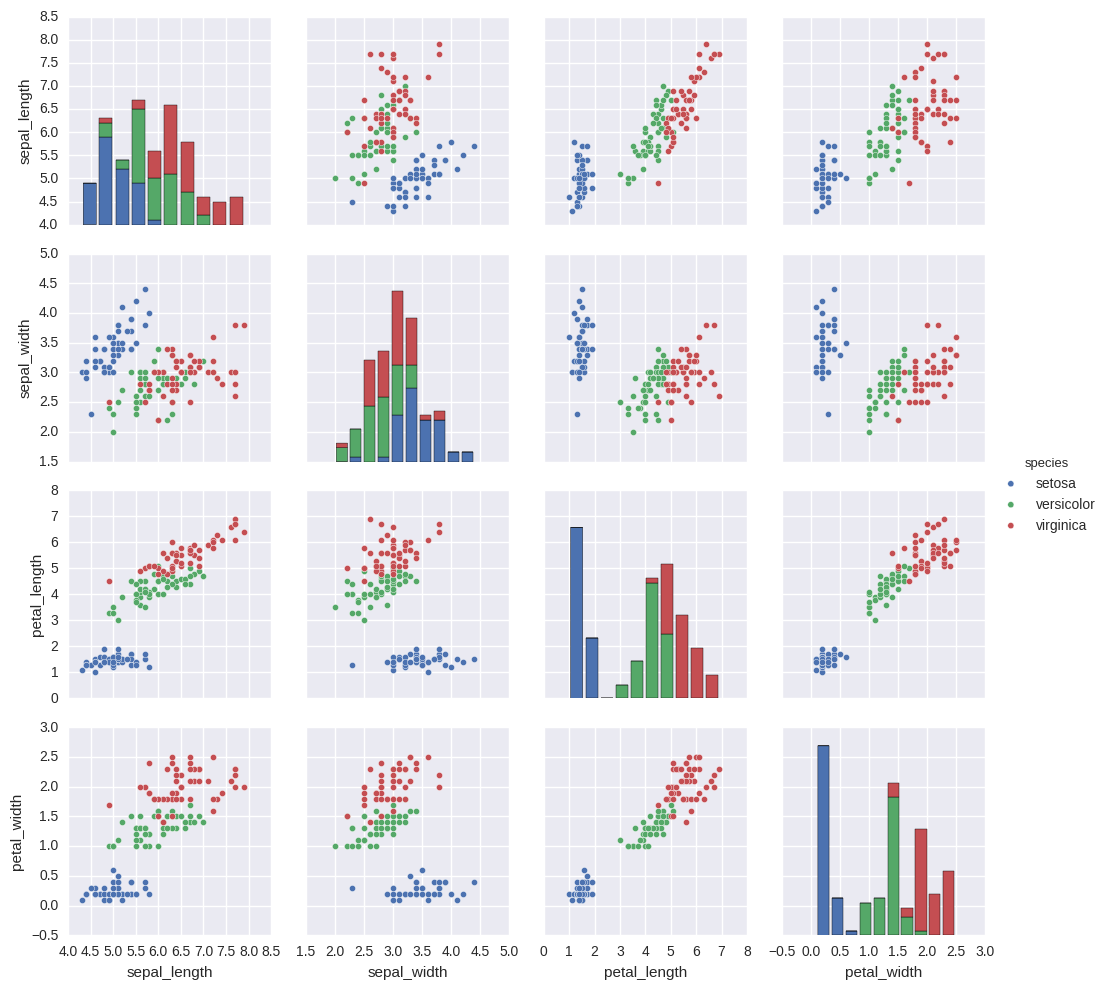

In [6]:
# Here we can see the pair plot of all the features we use in our dataset. On the diagonal there are histograms
# of each feature. The other plots are scatter plots of each pair of the feature.
sb.pairplot(iris.dropna(), hue='species');

Below you can see the model we will be using for machine learning. The model is called Decision Tree and is very common in the Machine Learning community. When evaluating the model we traverse from the top of the tree and decide based on the condition. If it holds we go left, if it does not we go right. When we end up in the leaf we can then output the probabilities for each class.
![title](iris_tree_best.png)
In the feature space the decision trees always cut perpendicular to each of the axis, since the always divide the feature space using a single feature. This can be viewed on the site [Other view of a decision tree](http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html).

In [7]:
# Since the library scikit-learn works on numerical matrices in the format of already mentioned library numpy,
# we need to transform all the inputs into the algorithms properly.
feat_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
all_inputs = iris[feat_names].values
# The species is the class we would like to be predicting.
all_classes = iris['species'].values

all_inputs[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [8]:
# Scikit provides us with basic functionality when we are trying to estimate the performance of our models.
# This is done by splitting the whole dataset into a training and testing dataset.
from sklearn.cross_validation import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75, random_state=1)

In [9]:
# This way we import the decision tree classifier class.
from sklearn.tree import DecisionTreeClassifier

# We create the classifier using it's constructor.
decision_tree_classifier = DecisionTreeClassifier()

# We train the classifier on the training examples.
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy.
# It is the number of correctly classified examples divided by the number of all examples.
print("Accuracy score: %.02f%%" % (decision_tree_classifier.score(testing_inputs, testing_classes)* 100))

Accuracy score: 97.37%


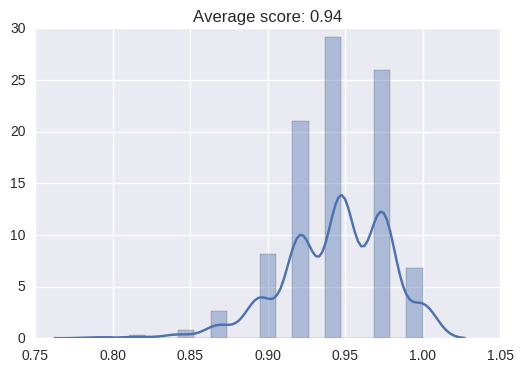

In [10]:
# In this experiment we are trying to show, that splitting the dataset only once and evaluting it
# might bring different results for each of the random splits. To get a better estimate of how
# do we score in our measures we can take many runs and estimate the accuracy with it's mean.
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)

sb.distplot(model_accuracies)
plt.title('Average score: %.02f' % (np.mean(model_accuracies)));
# Here we can see the distribution of 1000 repetitions of the train/test split and then training
# the classifier on training set and evaluating on testing set.
# We see that the range of different results is ~82% up to 100% accuracy. This experiment shows that
# the estimate of the accuracy needs to be also statitisticaly evaluated.

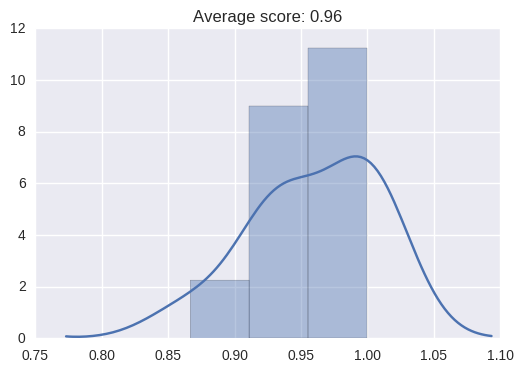

In [11]:
from sklearn.cross_validation import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)));

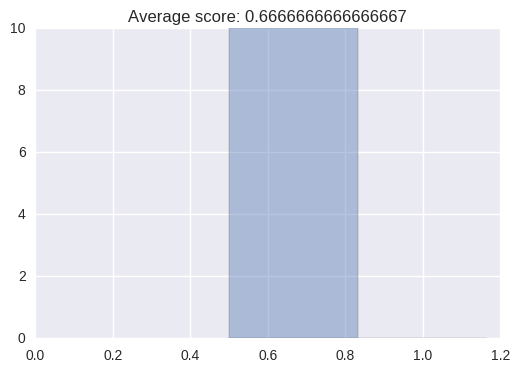

In [12]:
# The Decision Tree classifier has parameters that can control it's complexity.
# One of them is the maximum depth of the classifier. We set it here to 1.
# This means, that at the root of the tree there will be only one logical condition and that
# is the whole classifier.
decision_tree_classifier = DecisionTreeClassifier(max_depth=1) # <= here you can change the tree complexity 

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores, kde=False)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
# Here we use a more sophisticated method for evaluation called cross-validation.

[Cross validation](https://www.researchgate.net/profile/Halil_Bisgin/publication/228403467/figure/fig2/AS:302039595798534@1449023259454/Figure-4-k-fold-cross-validation-scheme-example.png)

In [13]:
# This cell computes one particular tree with the one train/test split to illustrate the model complexity
# from the preivous cell.
import sklearn.tree as tree
from sklearn.externals.six import StringIO
from sklearn.cross_validation import train_test_split

X = all_inputs
y = all_classes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

decision_tree_classifier.fit(X_train, y_train)

with open('iris_dtc_stump.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

!dot  -Tpng iris_dtc_stump.dot -o iris_tree_stump.png # Comment this line if you don't have dot in your path.

![title](iris_tree_stump.png)

In [14]:
# We can find the best parameters for the tree using a map of different parameters of the tree.
# This map contains for each of the parameters a list of values. Scikit can then create a grid
# of all combinations of each of the parameter's value and find out the best combination using
# cross-validation.
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: %.02f%%'%(grid_search.best_score_ * 100))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 96.00%
Best parameters: {'max_depth': 2, 'max_features': 3}


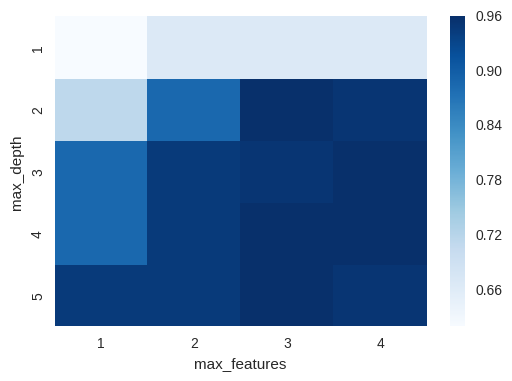

In [15]:
# Here we visualize the grid using a 2D grid image. The more blue the square is the better the combination.
grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth');

In [16]:
# Here we visualize the best combination of the two parameters.
decision_tree_classifier = grid_search.best_estimator_

import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('iris_dtc_best.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file, feature_names=feat_names)

!dot  -Tpng iris_dtc_best.dot -o iris_tree_best.png # Comment this line if you don't have dot in your path.

![title](iris_tree_best.png)

In [17]:
# Another dataset we would like to demonstrate the power of Machine Learning is the digits dataset.
# Here we load the digits dataset from the scikit ready to use datasets.
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

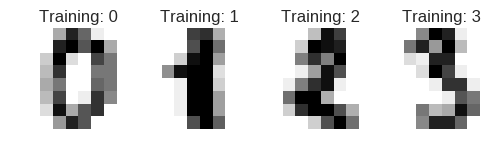

In [18]:
# Here we have the examples of training images. We can see that these are quite small grey-scale images
# and the classes of the images range from 0-9
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [19]:
# We can see that the dimension of each image is 8x8 and there are 1797 different images of digits.
digits.images.shape

(1797, 8, 8)

In [20]:
# Here we see a matrix of the image. 0 means white and 16 means black. Values between are the shades of gray.
print(digits.images[0])
print(digits.target[0])

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
0


In [21]:
# In order for us to plug images into the standard Machine Learning framework, we need to transform the
# matrix into a vector. This can be easily done in numpy by just reshaping the whole array.
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Here we set different parameters for the grid search.
parameter_grid = {'min_samples_split': [2, 5, 10, 15, 20],
                  'min_samples_leaf': [1, 10, 15, 20]}

# Initialize the grid search.
grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

# Here we use only first half of the dataset for sake of simplicity for the training and validation
# of the parameters.
grid_search.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

classifier = grid_search.best_estimator_
print(classifier)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=3, max_leaf_nodes=None, min_samples_leaf=15,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [22]:
# Now predict the value of the digit on the second half.
expected = digits.target[n_samples / 2:]
predicted = classifier.predict(data[n_samples / 2:])
# Note that this way we can face the problem of splitting the dataset
# in a way where we can't properly estimate the error. Since we have
# more data it would take too much time for a simple demonstration.

In [23]:
# We will be using a confusion matrix to better understand how the classifier makes errors.
# In the problem of digits it might be the case that the classifier mismatched 7 for a 9,
# if the circly of 9 is too small. The confusion matrix code below has the target or expected
# value as the first parameter and and the predicted as the second parameter.
metrics.confusion_matrix([1,1,2],[1,2,2]) # target, predicted
# We can see that the columns correspond to predictions and the rows are the target values.
# The goal of the classifier is to have zeros everywhere on the diagonal.
# In the confusion matrix below you can see that we correctly predicted 1 one time, as well as
# 2 one time, but we incorrectly said 2 instead of 1 one time.

array([[1, 1],
       [0, 1]])

In [24]:
# This cell computes the comfusion matrix. For example we see that we did not predict 
# 2 nor 8 for any of the examples. Also the accuracy is not that high, but note that for
# a simple classifier that would say 0 for any example, the accuracy would be 10%. This
# means that our classifier is better than a Dummy baseline.
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
print("Accuracy: %.02f %%" % (metrics.accuracy_score(expected,predicted)*100))
# rows are true labels, columns are predicted

Confusion matrix:
[[ 0  0  4 80  0  1  0  3  0  0]
 [ 0  0  9 29  0 37  0 16  0  0]
 [ 0  0 50 14  0  5  0 17  0  0]
 [ 0  0  1 76  0 12  0  2  0  0]
 [ 0  0  0 83  0  3  0  6  0  0]
 [ 0  0  0 64  0 21  0  6  0  0]
 [ 0  0  6 64  0  1  0 20  0  0]
 [ 0  0  0 34  0  9  0 46  0  0]
 [ 0  0  0 46  0 39  0  3  0  0]
 [ 0  0  0 78  0  5  0  9  0  0]]
Accuracy: 21.47 %


In [25]:
# If we want to try to improve the accuracy we can use more sophisticated models.
# Choosing the right model for the right task is one of the beaties of Machine Learning.
# Here we see how easy is to replace models in Machine Learning frameworks. We just
# put inside the grid search a Random Forest
from sklearn.ensemble import RandomForestClassifier
# grid_search = GridSearchCV(DecisionTreeClassifier(),
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=200),
                           param_grid=parameter_grid,
                           cv=cross_validation)

In [26]:
# We fit the classifier exactly the same way.
grid_search.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

classifier = grid_search.best_estimator_

Here are two simple explanations how Random Forest works:

[Simple Image Explanation Random Forest](http://i.cs.hku.hk/~msd15090/img/details/random_forest.png)

[Quora exaplanation](https://www.quora.com/How-does-randomization-in-a-random-forest-work)

In [27]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples / 2:]
predicted = classifier.predict(data[n_samples / 2:])

In [28]:
# We see that using a more sophisticated helps greatly for this model.
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
print("Accuracy: %.02f %%" % (metrics.accuracy_score(expected,predicted)*100))
# rows are true labels, columns are predicted

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 79  1  1  0  1  0  0  0  9]
 [ 1  0 78  4  0  0  0  0  0  3]
 [ 0  1  1 78  0  2  0  4  4  1]
 [ 1  0  0  0 87  1  0  2  0  1]
 [ 0  0  0  0  0 86  1  0  0  4]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  3  1  1  1  5  0  1 75  1]
 [ 0  0  0  2  0  3  0  0  1 86]]
Accuracy: 92.88 %


Congratulations, you have succesfully came to the end of this notebook. There are many things you can explore now. There are some other good introductory jupyter notebooks below. There is also good reading in the [Sklearn User Guide](http://scikit-learn.org/stable/user_guide.html).

# Next steps
[Titanic dataset](http://nbviewer.jupyter.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb)

[Number recognition](https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb)

# Resources

Good introductory jupyter notebooks: http://www.kdnuggets.com/2016/04/top-10-ipython-nb-tutorials.html

# Appendices
This part is goes into more detail for some parts of this notebook.
## Appendix 1
In the [Jupyter Notebook Iris](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb) the first parts deal with various data cleaning methods. These include exploratory data analysis for wrongly assigned values as well as dealing with missing data. These methods are common in practice, but in this case they are done on the whole dataset and not on a separate training set. This way we have no way how to evaluate these methods directly changing the values of the dataset. This might seemingly improve the performance of the models, but in practice these data errors might not be consistent for new data points.

If you would like to address this problem of data normalization before the learning process, you should explore the concept of scikit pipelines.